In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=281564d3b8cc9f50621b81b5a4d75b433df3e2da07d9ffdea346aa8fb22ce0e5
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
!pip install pyspark

In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [4]:

!apt-get install -q openjdk-8-jdk-headless -qq > /dev/null

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [6]:
!rm -rf spark-3.4.1-bin-hadoop3*

!wget -q https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz


!tar xf spark-3.4.1-bin-hadoop3.tgz

In [7]:

os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

In [8]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"
os.environ["PATH"] = os.environ["SPARK_HOME"] + "/bin:" + os.environ["PATH"]

In [9]:

!pip install -q findspark


import findspark
findspark.init()


In [10]:
!pip install -q pyspark
!pip install -q spylon-kernel


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.8/217.8 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [11]:

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Find Unique Users") \
    .getOrCreate()

In [12]:

df = spark.read.json('/content/short.json')

df.show()

+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+-----------------+-----+-------+-------+----+---------+-------+------+---+-----------------+--------------------+---------+-------+-------------+-------+--------------------+-------------+--------------------+--------------------+--------------------+
|     akey|    avn|   c|     crmid|    dateflink|             did|dtpe|evtno|firmware_revision|hardware_info|              idamid|         key|               lat|              lng|logno|    mnu|    mod| nwk|      ori|os_name|   osv| pf|platform_build_id|                 pro|profileid|    res|          rtc|    sdv|                 sid|     software|                 uid|          user_agent|     x-forwarded-for|
+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+----------

In [13]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Read JSON").getOrCreate()


df = spark.read.option("inferSchema", True).json("/content/short.json")

df.show()

df.printSchema()

spark.stop()

+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+-----------------+-----+-------+-------+----+---------+-------+------+---+-----------------+--------------------+---------+-------+-------------+-------+--------------------+-------------+--------------------+--------------------+--------------------+
|     akey|    avn|   c|     crmid|    dateflink|             did|dtpe|evtno|firmware_revision|hardware_info|              idamid|         key|               lat|              lng|logno|    mnu|    mod| nwk|      ori|os_name|   osv| pf|platform_build_id|                 pro|profileid|    res|          rtc|    sdv|                 sid|     software|                 uid|          user_agent|     x-forwarded-for|
+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+----------

In [14]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Read JSON with Inferred Schema").getOrCreate()


df = spark.read.option("inferSchema", "true").json("/content/short.json")



df.select("avn", "akey").show()


spark.stop()

+-------+---------+
|    avn|     akey|
+-------+---------+
|  6.0.8|109154002|
|1.6.6.4|109154002|
|  6.0.8|109154002|
|  6.0.8|109154002|
|  6.0.8|109154002|
|  6.0.8|109154002|
|  6.0.7|109154002|
|  6.0.8|109154002|
|  6.0.8|109154002|
|  6.0.7|109154002|
|  6.0.7|109154002|
|  6.0.7|109154002|
|  6.0.7|109154002|
|  6.0.8|109154002|
|1.6.6.4|109154002|
|  6.0.8|109154002|
|  6.0.8|109154002|
|  6.0.8|109154002|
|1.6.6.4|109154002|
|  6.0.8|109154002|
+-------+---------+



In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName("Read JSON with Inferred Schema").getOrCreate()


df = spark.read.option("inferSchema", "true").json("/content/short.json")


df.printSchema()


df = df.withColumn("akey", col("akey").cast("double"))

df = df.withColumn("newColumn", col("akey") + 2.0)

df.select("newColumn", "akey").show()

df.filter(col("akey") > 2).show()

df.filter(col("newColumn") > col("akey")).show()

df.select("avn", "akey").show()

spark.stop()

root
 |-- akey: string (nullable = true)
 |-- avn: string (nullable = true)
 |-- c: string (nullable = true)
 |-- crmid: string (nullable = true)
 |-- dateflink: long (nullable = true)
 |-- did: string (nullable = true)
 |-- dtpe: string (nullable = true)
 |-- evtno: string (nullable = true)
 |-- firmware_revision: string (nullable = true)
 |-- hardware_info: string (nullable = true)
 |-- idamid: string (nullable = true)
 |-- key: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lng: string (nullable = true)
 |-- logno: string (nullable = true)
 |-- mnu: string (nullable = true)
 |-- mod: string (nullable = true)
 |-- nwk: string (nullable = true)
 |-- ori: string (nullable = true)
 |-- os_name: string (nullable = true)
 |-- osv: string (nullable = true)
 |-- pf: string (nullable = true)
 |-- platform_build_id: string (nullable = true)
 |-- pro: struct (nullable = true)
 |    |-- HARD_CODE_DEVICE_ID: string (nullable = true)
 |    |-- avr: string (nullable = true)
 |   

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


spark = SparkSession.builder.appName("Read JSON with Inferred Schema").getOrCreate()

df = spark.read.option("inferSchema", "true").json("/content/short.json")



df = df.withColumn("akey", col("akey").cast("double"))

df = df.withColumn("newColumn", col("akey") + 2.0)

df.select("newColumn", "akey").show()

df.filter(col("akey") > 2).show()

df.filter(col("newColumn") > col("akey")).show()


df.select("avn", "akey").show()

spark.stop()


+------------+------------+
|   newColumn|        akey|
+------------+------------+
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
+------------+------------+

+------------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+-----------------+-----+-------+-------+----+---------+-------+------+---+-----------------+--------------------+---------+-------+-------------+-------+---------

In [17]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit

spark = SparkSession.builder.appName("Read JSON with Inferred Schema").getOrCreate()

df = spark.read.option("inferSchema", "true").json("/content/short.json")

df = df.withColumn("akey", col("akey").cast("double"))
df = df.withColumn("newColumn", col("akey") + lit(2.0))

df.select("newColumn", "akey").show()

spark.stop()

+------------+------------+
|   newColumn|        akey|
+------------+------------+
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
|1.09154004E8|1.09154002E8|
+------------+------------+



In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, concat

spark = SparkSession.builder.appName("Read JSON with Inferred Schema").getOrCreate()

df = spark.read.option("inferSchema", "true").json("/content/short.json")

df = df.withColumn("concatColumn", concat(col("did"), col("idamid")))

df.select("concatColumn", "did", "idamid").show()

spark.stop()

+--------------------+----------------+--------------------+
|        concatColumn|             did|              idamid|
+--------------------+----------------+--------------------+
|5034ef043e8f2749e...|5034ef043e8f2749|e281f8e4-bdea-4a5...|
|1dd45ec58313ebb46...|1dd45ec58313ebb4|6bf00fe8-dceb-464...|
|3bbb560707f29684a...|3bbb560707f29684|ab9096ac-57a8-426...|
|98020733e34987a91...|98020733e34987a9|171f3a72-697e-405...|
|e463668faa1d5874b...|e463668faa1d5874|b90c740d-6f9f-4ae...|
|a11e9f558353b3982...|a11e9f558353b398|2c58e8c8-4573-4ce...|
|c8e1820703f52ab82...|c8e1820703f52ab8|287796f8-f2f0-468...|
|87445dff7df45418f...|87445dff7df45418|fc0e777a-8544-426...|
|6b0cc8e17335e2ed4...|6b0cc8e17335e2ed|409f562a-70bb-4f5...|
|b5364b4e4efddc9a7...|b5364b4e4efddc9a|7208b35a-f88d-4d9...|
|f9ce164bc9da2ce18...|f9ce164bc9da2ce1|852f096b-18c2-4c4...|
|54305bd8b8d84a30a...|54305bd8b8d84a30|aa9dabb6-aa2f-4ce...|
|1556662b9b9bfb192...|1556662b9b9bfb19|2627d78f-9cad-4c9...|
|a41a92b866e55f403...|a4

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, concat, lit

spark = SparkSession.builder.appName("Spark Operations Example").getOrCreate()

df = spark.read.option("inferSchema", "true").json("/content/short.json")

df = df.withColumn("akey", col("akey").cast("double"))



rdd = df.rdd

pair_rdd = rdd.map(lambda row: (row['akey'], 1))

count_rdd = pair_rdd.reduceByKey(lambda a, b: a + b)

count_results = count_rdd.collect()
for result in count_results:
    print(result)

pair_rdd.collect()

spark.stop()


(109154002.0, 20)


In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, concat, lit

spark = SparkSession.builder.appName("Spark Operations Example").getOrCreate()

df = spark.read.option("inferSchema", "true").json("/content/short.json")

df = df.withColumn("crmid", col("crmid").cast("double"))
df = df.withColumn("newColumn", col("crmid") + lit(2.0))
df = df.withColumn("concatColumn", concat(col("did"), col("idamid")))

df.filter(col("newColumn") > col("crmid")).show()

rdd = df.rdd

pair_rdd = rdd.map(lambda row: (row['crmid'], 1))
count_rdd = pair_rdd.reduceByKey(lambda a, b: a + b)
count_results = count_rdd.collect()
for result in count_results:
    print(result)

filtered_rdd = rdd.filter(lambda row: row['crmid'] > 2)
filtered_df = filtered_rdd.toDF()
filtered_df.show()

spark.stop()


+---------+-------+----+-------------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+-----------------+-----+-------+-------+----+---------+-------+------+---+-----------------+--------------------+---------+-------+-------------+-------+--------------------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+
|     akey|    avn|   c|        crmid|    dateflink|             did|dtpe|evtno|firmware_revision|hardware_info|              idamid|         key|               lat|              lng|logno|    mnu|    mod| nwk|      ori|os_name|   osv| pf|platform_build_id|                 pro|profileid|    res|          rtc|    sdv|                 sid|     software|                 uid|          user_agent|     x-forwarded-for|    newColumn|        concatColumn|
+---------+-------+----+-------------+-------------+----------------+----+-----+----------------

In [21]:

for result in count_results:
    print(result)

(7047321247.0, 1)
(7137774035.0, 1)
(1124003909.0, 1)
(1132537431.0, 1)
(3071421502.0, 1)
(3140553756.0, 1)
(1140063322.0, 1)
(7086959243.0, 1)
(1108323902.0, 1)
(3073231160.0, 1)
(3122832937.0, 1)
(1135328819.0, 1)
(5101332368.0, 1)
(3005330614.0, 1)
(1112169282.0, 1)
(1218102819.0, 1)
(1032837923.0, 1)
(1197657474.0, 1)
(3135559391.0, 1)
(7150862665.0, 1)


In [22]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Find Unique Users") \
    .getOrCreate()

df = spark.read.json("/content/short.json")

unique_users_df = df.select("crmid").distinct()

unique_users_df.show()

spark.stop()


+----------+
|     crmid|
+----------+
|1197657474|
|7137774035|
|3135559391|
|1135328819|
|5101332368|
|3073231160|
|3140553756|
|1108323902|
|1132537431|
|3122832937|
|1140063322|
|7047321247|
|1124003909|
|1112169282|
|3071421502|
|7150862665|
|3005330614|
|1218102819|
|1032837923|
|7086959243|
+----------+



In [23]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Find Unique Users") \
    .getOrCreate()

df = spark.read.json("/content/short.json")

unique_users_df = df.select("mnu").distinct()

unique_users_df.show()

spark.stop()

+-------+
|    mnu|
+-------+
|   OPPO|
| Realme|
| Xiaomi|
|samsung|
|   vivo|
|    LYF|
| realme|
+-------+



In [24]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Jio Analytics") \
    .getOrCreate()

df = spark.read.json("/content/short.json")
df.show()


+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+-----------------+-----+-------+-------+----+---------+-------+------+---+-----------------+--------------------+---------+-------+-------------+-------+--------------------+-------------+--------------------+--------------------+--------------------+
|     akey|    avn|   c|     crmid|    dateflink|             did|dtpe|evtno|firmware_revision|hardware_info|              idamid|         key|               lat|              lng|logno|    mnu|    mod| nwk|      ori|os_name|   osv| pf|platform_build_id|                 pro|profileid|    res|          rtc|    sdv|                 sid|     software|                 uid|          user_agent|     x-forwarded-for|
+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+----------

In [25]:
from pyspark.sql.functions import col, from_unixtime

cleaned_df = df \
    .withColumn("rtc", from_unixtime(col("rtc"))) \
    .withColumn("WatchTimeInSeconds", col("pro.d").cast("int")) \
    .na.fill("unknown", ["pro.ch"]) \
    .dropDuplicates()

cleaned_df.show()

+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+-----------------+-----+-------+-------+----+---------+-------+------+---+-----------------+--------------------+---------+-------+--------------------+-------+--------------------+-------------+--------------------+--------------------+--------------------+------------------+
|     akey|    avn|   c|     crmid|    dateflink|             did|dtpe|evtno|firmware_revision|hardware_info|              idamid|         key|               lat|              lng|logno|    mnu|    mod| nwk|      ori|os_name|   osv| pf|platform_build_id|                 pro|profileid|    res|                 rtc|    sdv|                 sid|     software|                 uid|          user_agent|     x-forwarded-for|WatchTimeInSeconds|
+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+-----------

In [26]:
def enrich_geo_data(ip):
    return "SampleLocation"

from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

enrich_geo_data_udf = udf(enrich_geo_data, StringType())

enriched_df = cleaned_df.withColumn("GeoLocation", enrich_geo_data_udf(col("x-forwarded-for")))
enriched_df.show()


+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+-----------------+-----+-------+-------+----+---------+-------+------+---+-----------------+--------------------+---------+-------+--------------------+-------+--------------------+-------------+--------------------+--------------------+--------------------+------------------+--------------+
|     akey|    avn|   c|     crmid|    dateflink|             did|dtpe|evtno|firmware_revision|hardware_info|              idamid|         key|               lat|              lng|logno|    mnu|    mod| nwk|      ori|os_name|   osv| pf|platform_build_id|                 pro|profileid|    res|                 rtc|    sdv|                 sid|     software|                 uid|          user_agent|     x-forwarded-for|WatchTimeInSeconds|   GeoLocation|
+---------+-------+----+----------+-------------+----------------+----+-----+-------------

In [27]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Find Unique Users") \
    .getOrCreate()

df = spark.read.json("/content/short.json")

unique_users_df = df.select("uid").distinct()

unique_users_df.show()

spark.stop()

+--------------------+
|                 uid|
+--------------------+
|       bulbulibibi75|
|       ril7047321247|
|Suvama.Ankush.Wag...|
|         salamkhan19|
|hemantmadhukarrao...|
|      neelamkumar781|
|    tapaskumardas-64|
|      ujjalbiswas_50|
|           gokul9517|
|       ril1197657474|
|Vasava.Dilipkumar...|
|       ril3122832937|
|      serazahmad-060|
|     kingsukghosh-41|
|    shaikh.anam.bano|
|       ril3140553756|
|  mahliyamukeshbhai8|
| Arun.Ganpat.Talekar|
|       ril1132537431|
|       ril7086959243|
+--------------------+



In [28]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, from_unixtime, udf, lag, unix_timestamp, when, sum, countDistinct
from pyspark.sql.types import StringType
from pyspark.sql.window import Window

spark = SparkSession.builder \
    .appName("Event Analysis") \
    .getOrCreate()


df = spark.read.json("/content/short.json")

cleaned_df = df \
    .withColumn("rtc", from_unixtime(col("rtc"))) \
    .withColumn("WatchTimeInSeconds", col("pro.d").cast("int")) \
    .na.fill("unknown", ["pro.ch"]) \
    .dropDuplicates()

window_spec = Window.partitionBy("uid").orderBy("rtc")

session_df = cleaned_df \
    .withColumn("prev_rtc", lag("rtc", 1).over(window_spec)) \
    .withColumn("session_id", sum(when(unix_timestamp("rtc") - unix_timestamp("prev_rtc") > 1800, 1).otherwise(0)).over(window_spec))

event_analysis_df = session_df.groupBy("key").agg(
    sum("WatchTimeInSeconds").alias("TotalWatchTime"),
    countDistinct("uid").alias("UniqueUsers")
)

event_analysis_df.show()

spark.stop()

+------------+--------------+-----------+
|         key|TotalWatchTime|UniqueUsers|
+------------+--------------+-----------+
|media_access|          5535|         20|
+------------+--------------+-----------+



In [29]:
df.printSchema()

root
 |-- akey: string (nullable = true)
 |-- avn: string (nullable = true)
 |-- c: string (nullable = true)
 |-- crmid: string (nullable = true)
 |-- dateflink: long (nullable = true)
 |-- did: string (nullable = true)
 |-- dtpe: string (nullable = true)
 |-- evtno: string (nullable = true)
 |-- firmware_revision: string (nullable = true)
 |-- hardware_info: string (nullable = true)
 |-- idamid: string (nullable = true)
 |-- key: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lng: string (nullable = true)
 |-- logno: string (nullable = true)
 |-- mnu: string (nullable = true)
 |-- mod: string (nullable = true)
 |-- nwk: string (nullable = true)
 |-- ori: string (nullable = true)
 |-- os_name: string (nullable = true)
 |-- osv: string (nullable = true)
 |-- pf: string (nullable = true)
 |-- platform_build_id: string (nullable = true)
 |-- pro: struct (nullable = true)
 |    |-- HARD_CODE_DEVICE_ID: string (nullable = true)
 |    |-- avr: string (nullable = true)
 |   

In [30]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, sum, count

spark = SparkSession.builder.appName("YourAppName").getOrCreate()

try:
    session_df = spark.read.json("/content/short.json")

    user_behavior_df = session_df.groupBy("crmid").agg(
        sum("pro.watch_time_dock").alias("TotalWatchTime"),
        avg("pro.watch_time_dock").alias("AverageWatchTime"),
        count("pf").alias("PlatformCount"),
    )

    user_behavior_df.show()

finally:
    spark.stop()



+----------+--------------+----------------+-------------+
|     crmid|TotalWatchTime|AverageWatchTime|PlatformCount|
+----------+--------------+----------------+-------------+
|1197657474|           5.0|             5.0|            1|
|7137774035|          null|            null|            1|
|3135559391|          null|            null|            1|
|1135328819|           3.0|             3.0|            1|
|5101332368|           0.0|             0.0|            1|
|3073231160|           4.0|             4.0|            1|
|3140553756|           0.0|             0.0|            1|
|1108323902|           0.0|             0.0|            1|
|1132537431|           0.0|             0.0|            1|
|3122832937|          44.0|            44.0|            1|
|1140063322|           2.0|             2.0|            1|
|7047321247|           5.0|             5.0|            1|
|1124003909|           0.0|             0.0|            1|
|1112169282|          null|            null|            

In [31]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, sum, count

spark = SparkSession.builder.appName("YourAppName").getOrCreate()

try:
    session_df = spark.read.json("/content/short.json")

    channel_analysis_df = session_df.groupBy("pro.ch").agg(
    count("*").alias("EventCount"),
    sum("pro.watch_time_dock").alias("TotalWatchTime")

    )


    channel_analysis_df.show()

finally:
    spark.stop()

+--------------------+----------+--------------+
|                  ch|EventCount|TotalWatchTime|
+--------------------+----------+--------------+
|            Newslive|         1|           3.0|
|          Pogo+Hindi|         1|           0.0|
|        Zee+Business|         1|           0.0|
|         Zee+Kannada|         1|           0.0|
|           Zee+TV+HD|         2|           0.0|
|    Zee+Anmol+Cinema|         1|          44.0|
|      ABP News India|         1|          null|
|            Sony+SAB|         1|           2.0|
|Cartoon Network H...|         1|          null|
|          India news|         1|          null|
|           Zee+Anmol|         1|           5.0|
|             Sony+HD|         1|           5.0|
|         Sony+Six+HD|         1|           3.0|
|         Republic+TV|         1|           0.0|
|     Colors+Cineplex|         1|           0.0|
|          ABP+Ananda|         1|           4.0|
|           Colors+HD|         3|           0.0|
+-------------------

In [32]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, sum


spark = SparkSession.builder.appName("YourAppName").getOrCreate()

try:

    session_df = spark.read.json("/content/short.json")

    performance_metrics_df = session_df.groupBy("crmid").agg(
        avg("pro.timestamp").alias("AverageLag"),
        sum("pro.watch_time_dock").alias("TotalWatchTime")
    )


    performance_metrics_df.show()

finally:

    spark.stop()




+----------+----------+--------------+
|     crmid|AverageLag|TotalWatchTime|
+----------+----------+--------------+
|1197657474|      null|           5.0|
|7137774035|      null|          null|
|3135559391|      null|          null|
|1135328819|      null|           3.0|
|5101332368|      null|           0.0|
|3073231160|      null|           4.0|
|3140553756|      null|           0.0|
|1108323902|      null|           0.0|
|1132537431|      null|           0.0|
|3122832937|      null|          44.0|
|1140063322|      null|           2.0|
|7047321247|      null|           5.0|
|1124003909|      null|           0.0|
|1112169282|      null|          null|
|3071421502|      null|           0.0|
|7150862665|      null|           0.0|
|3005330614|      null|           0.0|
|1218102819|      null|           0.0|
|1032837923|      null|           0.0|
|7086959243|      null|           3.0|
+----------+----------+--------------+



In [33]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, sum


spark = SparkSession.builder.appName("YourAppName").getOrCreate()

try:

    session_df = spark.read.json("/content/short.json")

    session_df.toPandas().to_csv("session_data.csv", index=False)




finally:

    spark.stop()


In [34]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, sum


spark = SparkSession.builder.appName("YourAppName").getOrCreate()

try:

    session_df = spark.read.json("/content/short.json")

    session_df.cache()

    partitioned_df = session_df.repartition(10, "UID")




finally:

    spark.stop()

In [35]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, sum


spark = SparkSession.builder.appName("YourAppName").getOrCreate()

try:

    session_df = spark.read.json("/content/short.json")

    summary_stats = session_df.describe().show()





finally:

    spark.stop()



+-------+------------+-------+----+-------------------+------------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+-----------------+------------------+----+-------+----+---------+-------+------------------+----+--------------------+---------+-------+-------------------+-------+--------------------+-------------+-------------------+--------------------+--------------------+
|summary|        akey|    avn|   c|              crmid|         dateflink|             did|dtpe|evtno|firmware_revision|hardware_info|              idamid|         key|               lat|              lng|             logno| mnu|    mod| nwk|      ori|os_name|               osv|  pf|   platform_build_id|profileid|    res|                rtc|    sdv|                 sid|     software|                uid|          user_agent|     x-forwarded-for|
+-------+------------+-------+----+-------------------+------------------+----------------+----+-----+

# **Extract pro.d Field**

In [36]:
from pyspark.sql import SparkSession

# Restart Spark session
spark = SparkSession.builder \
    .appName("Jio Analytics Data Engineering") \
    .getOrCreate()

# Load the JSON file
df = spark.read.json('/content/short.json')




# Extract the nested field `pro.d` into a separate column
cleaned_df = df.withColumn("WatchTimeInSeconds", col("pro.d").cast("int"))

# Convert rtc to a readable timestamp
cleaned_df = cleaned_df.withColumn("rtc", from_unixtime(col("rtc")))

cleaned_df.show()


+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+-----------------+-----+-------+-------+----+---------+-------+------+---+-----------------+--------------------+---------+-------+--------------------+-------+--------------------+-------------+--------------------+--------------------+--------------------+------------------+
|     akey|    avn|   c|     crmid|    dateflink|             did|dtpe|evtno|firmware_revision|hardware_info|              idamid|         key|               lat|              lng|logno|    mnu|    mod| nwk|      ori|os_name|   osv| pf|platform_build_id|                 pro|profileid|    res|                 rtc|    sdv|                 sid|     software|                 uid|          user_agent|     x-forwarded-for|WatchTimeInSeconds|
+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+-----------

# **Fill Missing Values and Normalize**

In [37]:
from pyspark.sql.functions import col, from_unixtime, mean, stddev, dayofweek, hour, sum, when, unix_timestamp, lag
from pyspark.sql.window import Window

# Fill missing WatchTimeInSeconds with the mean value
mean_watch_time = cleaned_df.select(mean("WatchTimeInSeconds")).collect()[0][0]
cleaned_df = cleaned_df.fillna({'WatchTimeInSeconds': mean_watch_time})

# Normalize WatchTimeInSeconds
watch_time_mean = cleaned_df.select(mean(col("WatchTimeInSeconds"))).collect()[0][0]
watch_time_stddev = cleaned_df.select(stddev(col("WatchTimeInSeconds"))).collect()[0][0]

cleaned_df = cleaned_df.withColumn("NormalizedWatchTime",
                                   (col("WatchTimeInSeconds") - watch_time_mean) / watch_time_stddev)

cleaned_df.show()


+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+-----------------+-----+-------+-------+----+---------+-------+------+---+-----------------+--------------------+---------+-------+--------------------+-------+--------------------+-------------+--------------------+--------------------+--------------------+------------------+--------------------+
|     akey|    avn|   c|     crmid|    dateflink|             did|dtpe|evtno|firmware_revision|hardware_info|              idamid|         key|               lat|              lng|logno|    mnu|    mod| nwk|      ori|os_name|   osv| pf|platform_build_id|                 pro|profileid|    res|                 rtc|    sdv|                 sid|     software|                 uid|          user_agent|     x-forwarded-for|WatchTimeInSeconds| NormalizedWatchTime|
+---------+-------+----+----------+-------------+----------------+----+-----+-

# **Proceed with Advanced Data Cleaning and Transformation**


In [38]:
# Extract day of the week and hour of the day from rtc
cleaned_df = cleaned_df.withColumn("day_of_week", dayofweek(col("rtc"))) \
                       .withColumn("hour_of_day", hour(col("rtc")))

# User behavior features: count number of sessions per user
window_spec = Window.partitionBy("uid").orderBy("rtc")

session_df = cleaned_df.withColumn("prev_rtc", lag("rtc", 1).over(window_spec)) \
                       .withColumn("session_id", sum(when(unix_timestamp("rtc") - unix_timestamp("prev_rtc") > 1800, 1).otherwise(0)).over(window_spec))

user_behavior_df = session_df.groupBy("uid").agg(
    countDistinct("session_id").alias("num_sessions"),
    sum("WatchTimeInSeconds").alias("total_watch_time")
)

# Show the user behavior DataFrame
user_behavior_df.show()

# Stop the Spark session
spark.stop()


+--------------------+------------+----------------+
|                 uid|num_sessions|total_watch_time|
+--------------------+------------+----------------+
| Arun.Ganpat.Talekar|           1|               0|
|Suvama.Ankush.Wag...|           1|              22|
|Vasava.Dilipkumar...|           1|            1095|
|       bulbulibibi75|           1|               0|
|           gokul9517|           1|             314|
|hemantmadhukarrao...|           1|             546|
|     kingsukghosh-41|           1|              48|
|  mahliyamukeshbhai8|           1|               9|
|      neelamkumar781|           1|               2|
|       ril1132537431|           1|               0|
|       ril1197657474|           1|              11|
|       ril3122832937|           1|              52|
|       ril3140553756|           1|             685|
|       ril7047321247|           1|               3|
|       ril7086959243|           1|              41|
|         salamkhan19|           1|           

In [39]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression


failed attempt


In [40]:
# Import necessary functions again
from pyspark.sql import SparkSession

# Restart Spark session
spark = SparkSession.builder \
    .appName("Jio Analytics Data Engineering") \
    .getOrCreate()

# Load the first JSON file
df = spark.read.json('/content/short.json')

# Load the second JSON file
other_df = spark.read.json("/content/second.json")

# Perform an inner join on a common column
common_column = "uid"
joined_df = df.join(other_df.alias("other"), on=common_column, how="inner")

# Show the schema of the joined DataFrame
joined_df.printSchema()

# Show a sample of the joined DataFrame
joined_df.show()

# Stop the Spark session
spark.stop()


AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/content/second.json.


## **Machine Learning**

In [41]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression


In [42]:
from pyspark.sql import SparkSession

# Restart Spark session
spark = SparkSession.builder \
    .appName("Jio Analytics Data Engineering") \
    .getOrCreate()

# Load the JSON file
df = spark.read.json('/content/short.json')




# Extract the nested field `pro.d` into a separate column
cleaned_df = df.withColumn("WatchTimeInSeconds", col("pro.d").cast("int"))

# Convert rtc to a readable timestamp
cleaned_df = cleaned_df.withColumn("rtc", from_unixtime(col("rtc")))

cleaned_df.show()


+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+-----------------+-----+-------+-------+----+---------+-------+------+---+-----------------+--------------------+---------+-------+--------------------+-------+--------------------+-------------+--------------------+--------------------+--------------------+------------------+
|     akey|    avn|   c|     crmid|    dateflink|             did|dtpe|evtno|firmware_revision|hardware_info|              idamid|         key|               lat|              lng|logno|    mnu|    mod| nwk|      ori|os_name|   osv| pf|platform_build_id|                 pro|profileid|    res|                 rtc|    sdv|                 sid|     software|                 uid|          user_agent|     x-forwarded-for|WatchTimeInSeconds|
+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+-----------

In [43]:
from pyspark.sql.functions import col, from_unixtime, mean, stddev, dayofweek, hour, sum, when, unix_timestamp, lag
from pyspark.sql.window import Window

# Fill missing WatchTimeInSeconds with the mean value
mean_watch_time = cleaned_df.select(mean("WatchTimeInSeconds")).collect()[0][0]
cleaned_df = cleaned_df.fillna({'WatchTimeInSeconds': mean_watch_time})

# Normalize WatchTimeInSeconds
watch_time_mean = cleaned_df.select(mean(col("WatchTimeInSeconds"))).collect()[0][0]
watch_time_stddev = cleaned_df.select(stddev(col("WatchTimeInSeconds"))).collect()[0][0]

cleaned_df = cleaned_df.withColumn("NormalizedWatchTime",
                                   (col("WatchTimeInSeconds") - watch_time_mean) / watch_time_stddev)

cleaned_df.show()

+---------+-------+----+----------+-------------+----------------+----+-----+-----------------+-------------+--------------------+------------+------------------+-----------------+-----+-------+-------+----+---------+-------+------+---+-----------------+--------------------+---------+-------+--------------------+-------+--------------------+-------------+--------------------+--------------------+--------------------+------------------+--------------------+
|     akey|    avn|   c|     crmid|    dateflink|             did|dtpe|evtno|firmware_revision|hardware_info|              idamid|         key|               lat|              lng|logno|    mnu|    mod| nwk|      ori|os_name|   osv| pf|platform_build_id|                 pro|profileid|    res|                 rtc|    sdv|                 sid|     software|                 uid|          user_agent|     x-forwarded-for|WatchTimeInSeconds| NormalizedWatchTime|
+---------+-------+----+----------+-------------+----------------+----+-----+-

In [44]:
cleaned_df.printSchema()

root
 |-- akey: string (nullable = true)
 |-- avn: string (nullable = true)
 |-- c: string (nullable = true)
 |-- crmid: string (nullable = true)
 |-- dateflink: long (nullable = true)
 |-- did: string (nullable = true)
 |-- dtpe: string (nullable = true)
 |-- evtno: string (nullable = true)
 |-- firmware_revision: string (nullable = true)
 |-- hardware_info: string (nullable = true)
 |-- idamid: string (nullable = true)
 |-- key: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lng: string (nullable = true)
 |-- logno: string (nullable = true)
 |-- mnu: string (nullable = true)
 |-- mod: string (nullable = true)
 |-- nwk: string (nullable = true)
 |-- ori: string (nullable = true)
 |-- os_name: string (nullable = true)
 |-- osv: string (nullable = true)
 |-- pf: string (nullable = true)
 |-- platform_build_id: string (nullable = true)
 |-- pro: struct (nullable = true)
 |    |-- HARD_CODE_DEVICE_ID: string (nullable = true)
 |    |-- avr: string (nullable = true)
 |   

In [45]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Linear Regression Example") \
    .getOrCreate()

# Assuming you have already cleaned and transformed your data in cleaned_df

# Verify column names
expected_columns = ["akey", "avn", "rtc"]  # Adjust this list as per your actual column names
for col_name in expected_columns:
    assert col_name in df.columns, f"Column '{col_name}' not found in DataFrame."

# Convert string columns to numeric (assuming they are supposed to be numeric)
df = df.withColumn("akey", col("akey").cast("double"))
df = df.withColumn("avn", col("avn").cast("double"))
df = df.withColumn("rtc", col("rtc").cast("double"))

# Create VectorAssembler
assembler = VectorAssembler(inputCols=["akey", "avn"], outputCol="features")
feature_df = assembler.transform(df)

# Split data into training and test sets
train_df, test_df = feature_df.randomSplit([0.8, 0.2], seed=42)

# Initialize LinearRegression model
lr = LinearRegression(featuresCol="features", labelCol="rtc")

# Fit the model on training data
lr_model = lr.fit(train_df)

# Make predictions on test data
predictions = lr_model.transform(test_df)

# Show predictions
predictions.show()

# Stop Spark session
spark.stop()



Py4JJavaError: An error occurred while calling o1097.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 13.0 failed 1 times, most recent failure: Lost task 0.0 in stage 13.0 (TID 10) (586f61900fea executor driver): org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (VectorAssembler$$Lambda$4365/546872049: (struct<akey:double,avn:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:217)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.sort_addToSorter_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.TraversableOnce.foldLeft(TraversableOnce.scala:199)
	at scala.collection.TraversableOnce.foldLeft$(TraversableOnce.scala:192)
	at scala.collection.AbstractIterator.foldLeft(Iterator.scala:1431)
	at scala.collection.TraversableOnce.aggregate(TraversableOnce.scala:260)
	at scala.collection.TraversableOnce.aggregate$(TraversableOnce.scala:260)
	at scala.collection.AbstractIterator.aggregate(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$4(RDD.scala:1234)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$6(RDD.scala:1235)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:853)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:853)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: Encountered null while assembling a row with handleInvalid = "error". Consider
removing nulls from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1(VectorAssembler.scala:291)
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1$adapted(VectorAssembler.scala:260)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:260)
	at org.apache.spark.ml.feature.VectorAssembler.$anonfun$transform$6(VectorAssembler.scala:143)
	... 32 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2785)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2721)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2720)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2720)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1206)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2984)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2923)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2912)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:971)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2263)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2358)
	at org.apache.spark.rdd.RDD.$anonfun$fold$1(RDD.scala:1172)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.RDD.fold(RDD.scala:1166)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$2(RDD.scala:1259)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1226)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$1(RDD.scala:1212)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1212)
	at org.apache.spark.ml.optim.WeightedLeastSquares.fit(WeightedLeastSquares.scala:107)
	at org.apache.spark.ml.regression.LinearRegression.trainWithNormal(LinearRegression.scala:456)
	at org.apache.spark.ml.regression.LinearRegression.$anonfun$train$1(LinearRegression.scala:354)
	at org.apache.spark.ml.util.Instrumentation$.$anonfun$instrumented$1(Instrumentation.scala:191)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:191)
	at org.apache.spark.ml.regression.LinearRegression.train(LinearRegression.scala:329)
	at org.apache.spark.ml.regression.LinearRegression.train(LinearRegression.scala:186)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:114)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (VectorAssembler$$Lambda$4365/546872049: (struct<akey:double,avn:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:217)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.sort_addToSorter_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.TraversableOnce.foldLeft(TraversableOnce.scala:199)
	at scala.collection.TraversableOnce.foldLeft$(TraversableOnce.scala:192)
	at scala.collection.AbstractIterator.foldLeft(Iterator.scala:1431)
	at scala.collection.TraversableOnce.aggregate(TraversableOnce.scala:260)
	at scala.collection.TraversableOnce.aggregate$(TraversableOnce.scala:260)
	at scala.collection.AbstractIterator.aggregate(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$4(RDD.scala:1234)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$6(RDD.scala:1235)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:853)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:853)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: org.apache.spark.SparkException: Encountered null while assembling a row with handleInvalid = "error". Consider
removing nulls from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1(VectorAssembler.scala:291)
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1$adapted(VectorAssembler.scala:260)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:260)
	at org.apache.spark.ml.feature.VectorAssembler.$anonfun$transform$6(VectorAssembler.scala:143)
	... 32 more


# **visualization**

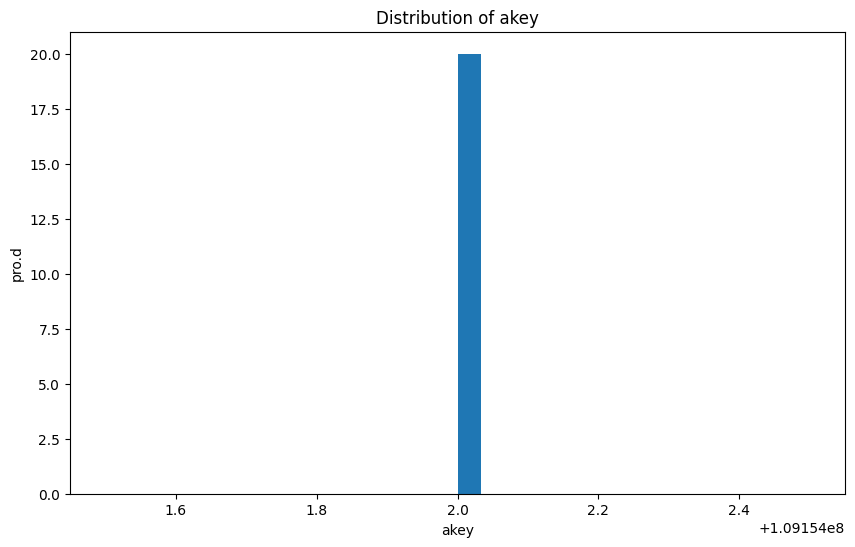

In [46]:
import matplotlib.pyplot as plt

pandas_df = df.toPandas()

plt.figure(figsize=(10, 6))
plt.hist(pandas_df["akey"], bins=30)
plt.xlabel("akey")
plt.ylabel("pro.d")
plt.title("Distribution of akey")
plt.show()

# **optimization**

In [47]:
df = df.repartition(10, "UID")
df.cache()
df.count()

20

# **Advanced Analytics and Performance Metrics**

In [48]:
session_df = spark.read.json("/content/short.json")
channel_analysis_df = session_df.groupBy("pro.ch").agg(
    count("*").alias("EventCount"),
    sum("pro.watch_time_dock").alias("TotalWatchTime")
)
channel_analysis_df.show()

performance_metrics_df = session_df.groupBy("crmid").agg(
    avg("pro.timestamp").alias("AverageLag"),
    sum("pro.watch_time_dock").alias("TotalWatchTime")
)
performance_metrics_df.show()

session_df.toPandas().to_csv("session_data.csv", index=False)

partitioned_df = session_df.repartition(10, "UID")

summary_stats = session_df.describe().show()

+--------------------+----------+--------------+
|                  ch|EventCount|TotalWatchTime|
+--------------------+----------+--------------+
|            Newslive|         1|           3.0|
|          Pogo+Hindi|         1|           0.0|
|        Zee+Business|         1|           0.0|
|         Zee+Kannada|         1|           0.0|
|           Zee+TV+HD|         2|           0.0|
|    Zee+Anmol+Cinema|         1|          44.0|
|      ABP News India|         1|          null|
|            Sony+SAB|         1|           2.0|
|Cartoon Network H...|         1|          null|
|          India news|         1|          null|
|           Zee+Anmol|         1|           5.0|
|             Sony+HD|         1|           5.0|
|         Sony+Six+HD|         1|           3.0|
|         Republic+TV|         1|           0.0|
|     Colors+Cineplex|         1|           0.0|
|          ABP+Ananda|         1|           4.0|
|           Colors+HD|         3|           0.0|
+-------------------